In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report


In [2]:
df=pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')


In [3]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [6]:
df=df.drop(['StudentID'],axis=1)

In [7]:
df.tail()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0
2391,16,1,0,2,17.819907,13,0,2,0,0,0,1,2.140014,1.0


In [8]:
df.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [9]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA', 'GradeClass'],
      dtype='object')

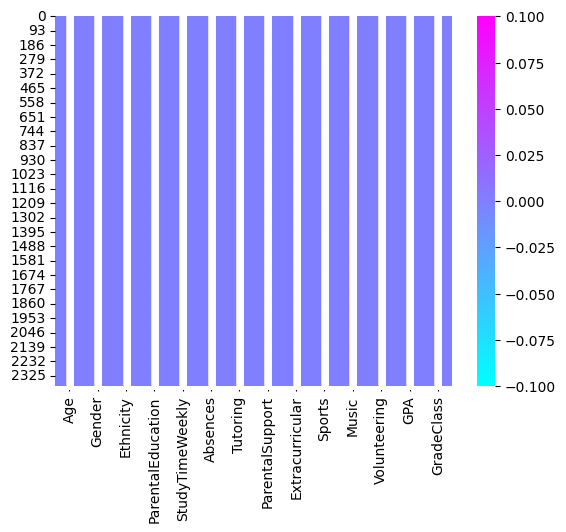

In [10]:
sns.heatmap(df.isnull(),annot=True,cmap='cool')
plt.show()

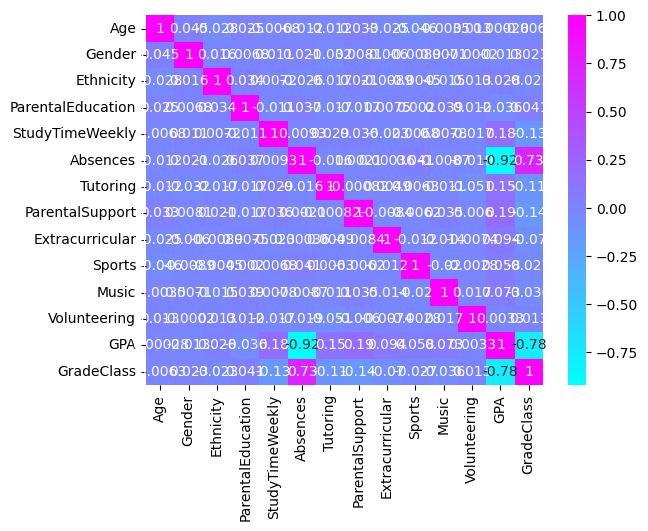

In [11]:
df_corr=df.corr()
sns.heatmap(df_corr,annot=True,cmap='cool')
plt.show()

In [12]:
df['Gender'].unique()

array([1, 0])

In [13]:
sex=df['Gender'].value_counts().reset_index()
sex

,Gender,count
0,1,1222
1,0,1170


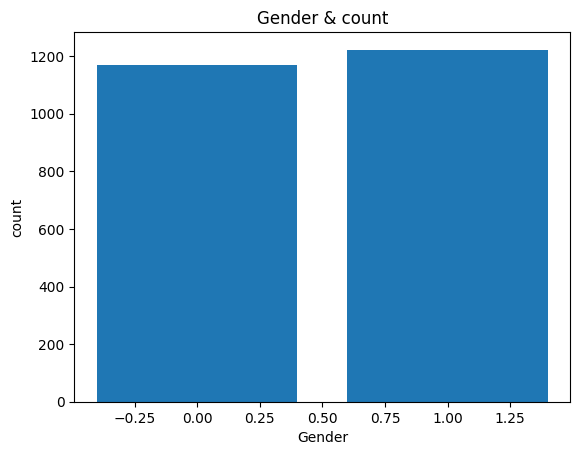

In [14]:
plt.bar(df['Gender'].unique(),df['Gender'].value_counts())
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender & count')
plt.show()

Text(0.5, 1.0, 'Student Gender')

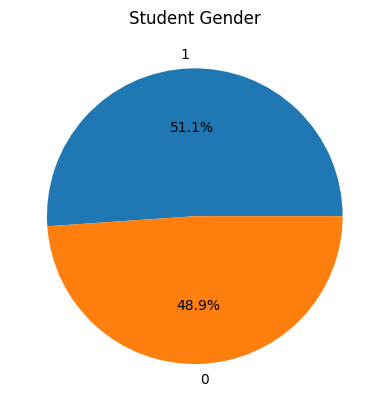

In [15]:
plt.pie(x=df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title("Student Gender")

In [16]:
df['ParentalEducation'].unique()

array([2, 1, 3, 4, 0])

In [17]:
par_edu=df['ParentalEducation'].value_counts().reset_index()
par_edu

,ParentalEducation,count
0,2,934
1,1,728
2,3,367
3,0,243
4,4,120


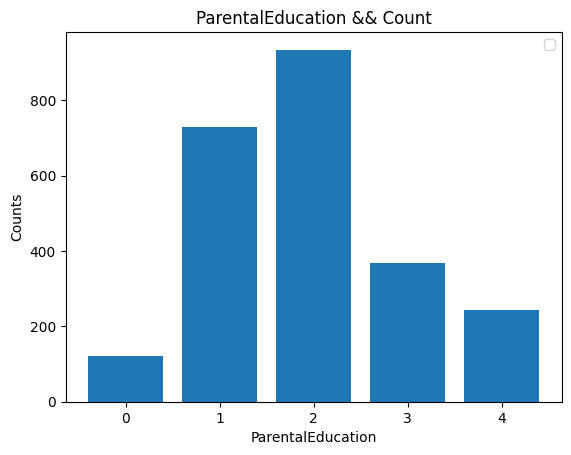

In [18]:
plt.bar(df['ParentalEducation'].unique(),df['ParentalEducation'].value_counts())
plt.title('ParentalEducation && Count')
plt.xlabel('ParentalEducation')
plt.ylabel('Counts')
plt.legend()
plt.show()

Text(0.5, 1.0, 'ParentalEducation')

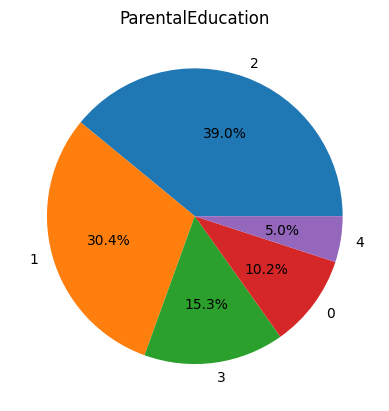

In [19]:
plt.pie(x=df['ParentalEducation'].value_counts(),labels=df['ParentalEducation'].value_counts().index,autopct='%1.1f%%')
plt.title("ParentalEducation")

Text(0.5, 1.0, 'Education & count')

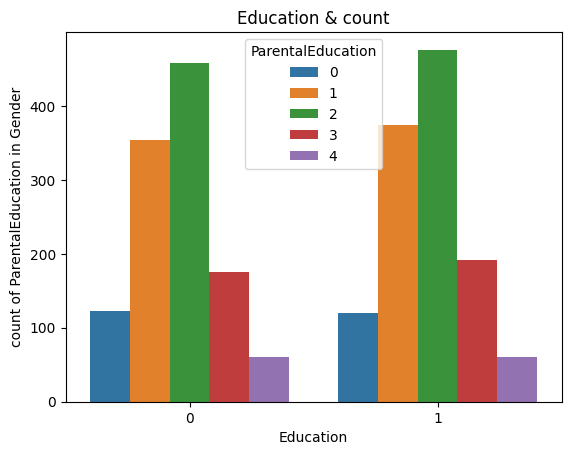

In [20]:
sns.countplot(x='Gender',hue='ParentalEducation',data=df)
plt.xlabel('Education')
plt.ylabel('count of ParentalEducation in Gender')
plt.title('Education & count')

Text(0.5, 1.0, 'Gender & count')

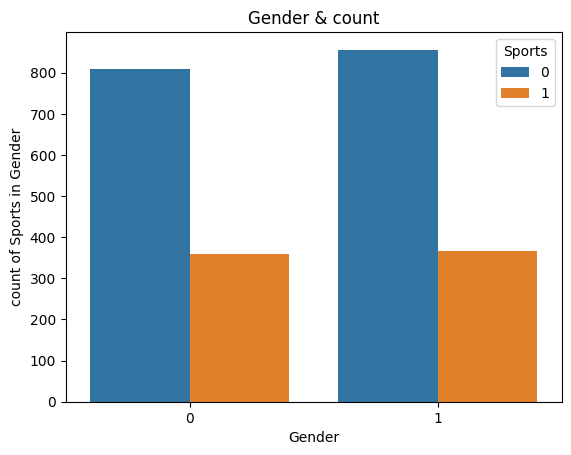

In [21]:
sns.countplot(x='Gender',hue='Sports',data=df)
plt.xlabel('Gender')
plt.ylabel('count of Sports in Gender')
plt.title('Gender & count')

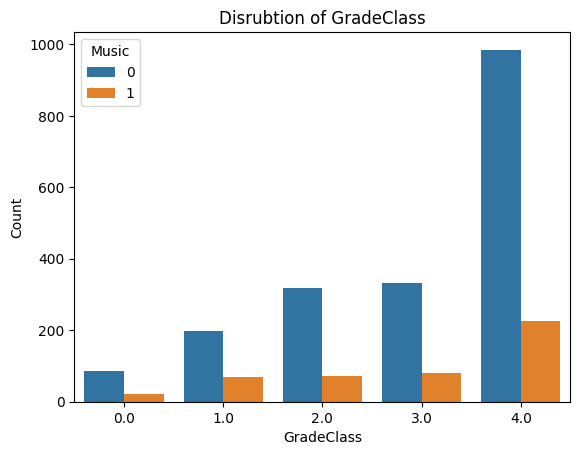

In [22]:
sns.countplot(x='GradeClass',hue='Music',data=df)
plt.title('Disrubtion of GradeClass')
plt.xlabel('GradeClass')
plt.ylabel('Count')
plt.show()

In [23]:
X=df.drop(['GradeClass'],axis=1)
y=df['GradeClass']

In [24]:
X.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061


In [25]:
y.head()

0    2.0
1    1.0
2    4.0
3    3.0
4    4.0
Name: GradeClass, dtype: float64

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)
X_train.shape

(1674, 13)

In [27]:
lo=LogisticRegression()

In [28]:
lo.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
lo.score(X_test,y_test)

0.7311977715877437

In [30]:
y_pred=lo.predict(X_test)

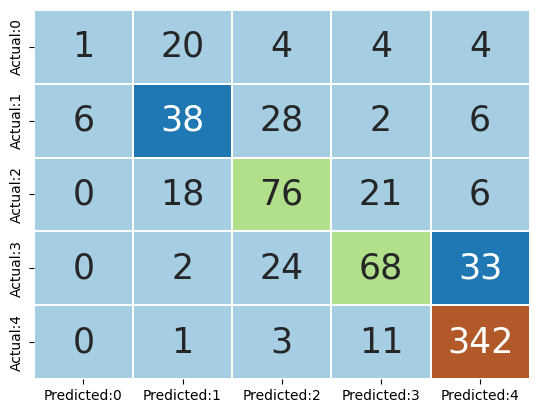

In [31]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [32]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.14      0.03      0.05        33\n         1.0       0.48      0.47      0.48        80\n         2.0       0.56      0.63      0.59       121\n         3.0       0.64      0.54      0.58       127\n         4.0       0.87      0.96      0.91       357\n\n    accuracy                           0.73       718\n   macro avg       0.54      0.53      0.52       718\nweighted avg       0.70      0.73      0.71       718\n'

In [33]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 73.11977715877437


/tmp/ipykernel_18/3285510846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3285510846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an 

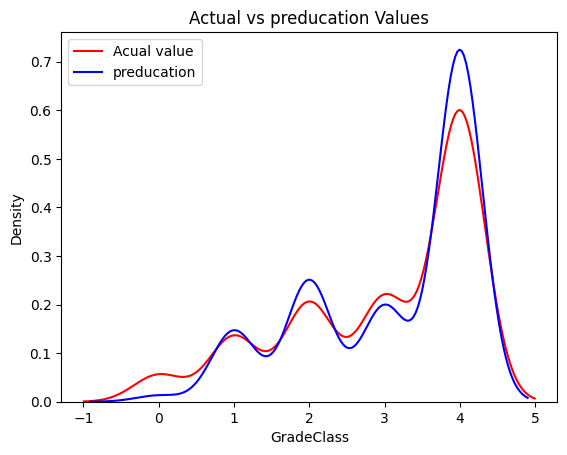

In [34]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(y_pred,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.legend()
plt.show()
plt.close()

In [35]:
sv=SVC(kernel='linear', random_state = 42)


In [36]:
sv.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [37]:
sv.score(X_test,y_test)

0.8454038997214485

In [38]:
y_pred=sv.predict(X_test)

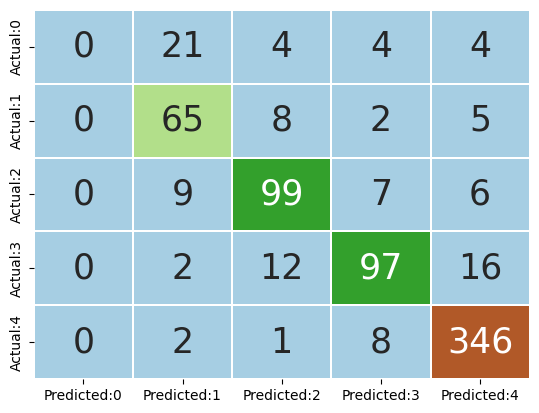

In [39]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [40]:
classification_report(y_test,y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n         0.0       0.00      0.00      0.00        33\n         1.0       0.66      0.81      0.73        80\n         2.0       0.80      0.82      0.81       121\n         3.0       0.82      0.76      0.79       127\n         4.0       0.92      0.97      0.94       357\n\n    accuracy                           0.85       718\n   macro avg       0.64      0.67      0.65       718\nweighted avg       0.81      0.85      0.83       718\n'

In [41]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 84.54038997214485


/tmp/ipykernel_18/3285510846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3285510846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an 

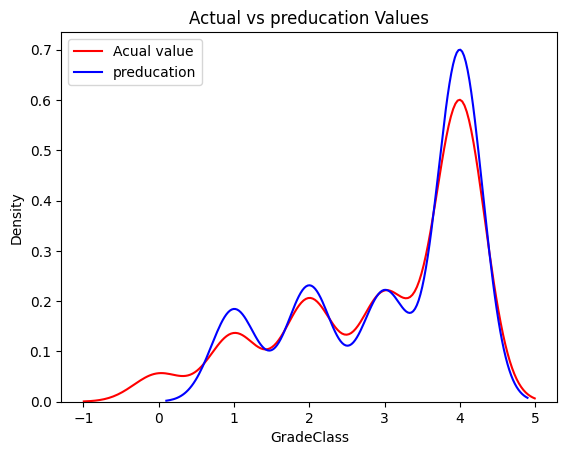

In [42]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(y_pred,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.legend()
plt.show()
plt.close()

In [43]:
rfc=RandomForestClassifier()

In [44]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
rfc.score(X_test,y_test)

0.9164345403899722

In [46]:
y_pred=rfc.predict(X_test)

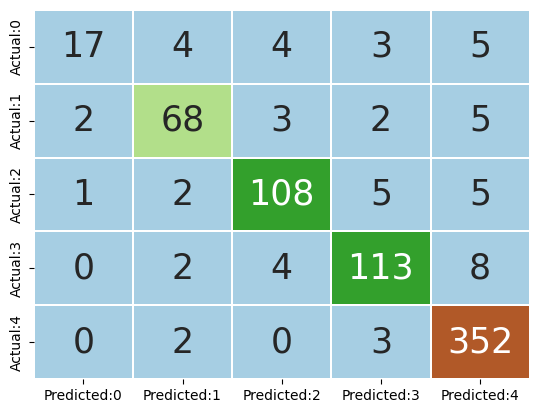

In [47]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [48]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.85      0.52      0.64        33\n         1.0       0.87      0.85      0.86        80\n         2.0       0.91      0.89      0.90       121\n         3.0       0.90      0.89      0.89       127\n         4.0       0.94      0.99      0.96       357\n\n    accuracy                           0.92       718\n   macro avg       0.89      0.83      0.85       718\nweighted avg       0.91      0.92      0.91       718\n'

In [49]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 91.64345403899722


/tmp/ipykernel_18/3285510846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3285510846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an 

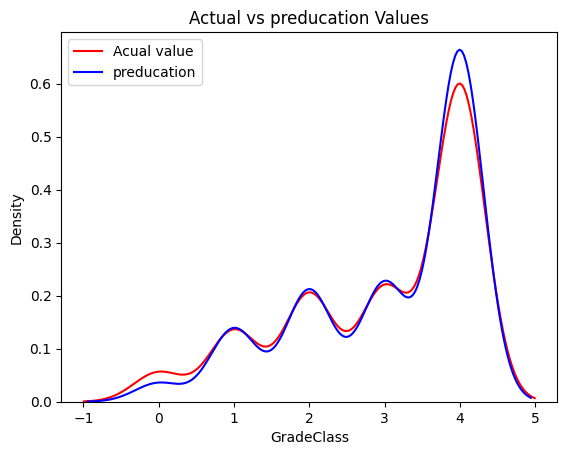

In [50]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(y_pred,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.legend()
plt.show()
plt.close()

In [51]:
DT=DecisionTreeClassifier()

In [52]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
DT.score(X_test,y_test)

0.8189415041782729

In [54]:
y_pred=DT.predict(X_test)

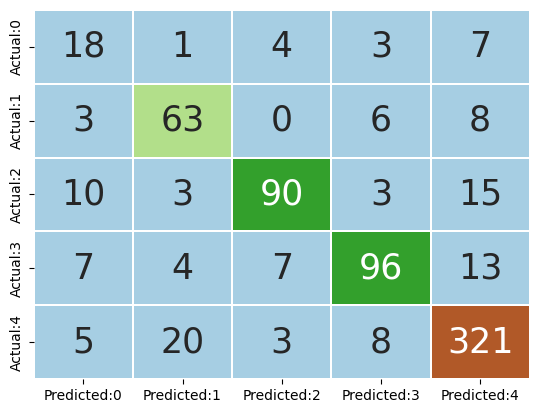

In [55]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3','Predicted:4'], index = ['Actual:0','Actual:1','Actual:2','Actual:3','Actual:4'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.show()

In [56]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.42      0.55      0.47        33\n         1.0       0.69      0.79      0.74        80\n         2.0       0.87      0.74      0.80       121\n         3.0       0.83      0.76      0.79       127\n         4.0       0.88      0.90      0.89       357\n\n    accuracy                           0.82       718\n   macro avg       0.74      0.75      0.74       718\nweighted avg       0.83      0.82      0.82       718\n'

In [57]:
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 81.89415041782729


/tmp/ipykernel_18/3285510846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3285510846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an 

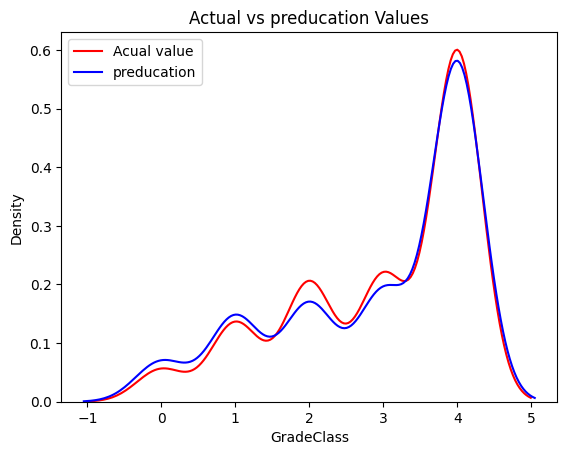

In [58]:
ax1=sns.distplot(y_test,color='r',hist=False,label='Acual value')
sns.distplot(y_pred,color='b',hist=False,label='preducation',ax=ax1)
plt.title('Actual vs preducation Values')
plt.legend()
plt.show()
plt.close()

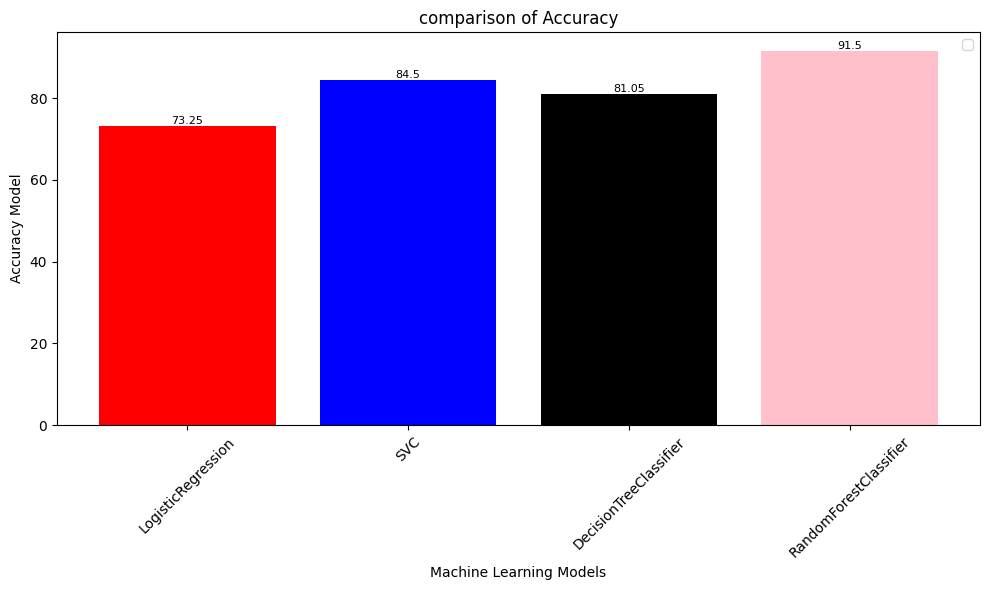

In [59]:
model_name=['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier']
accuracy_model=[ 73.25,84.5,81.05,91.5]
colors=['red','blue','black','pink']
plt.figure(figsize=(10,6))
bars=plt.bar(model_name,accuracy_model,color=colors)
plt.title('comparison of Accuracy')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Model')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
for bar,score in zip(bars,accuracy_model):
    yval=bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval+.01,round(score,3),
            ha='center',va='bottom',fontsize=8)
plt.show()